In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

 Momentum Trading 





In [2]:
# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

In [3]:
# Fetch historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [4]:
# Calculate a momentum indicator (e.g., 50-day moving average)
n = 50  # Lookback period
stock_data['SMA'] = stock_data['Adj Close'].rolling(window=n).mean()


In [5]:
# Create a new column to signal buy/sell
stock_data['Signal'] = 0  # Default: no signal

# Create a buy signal when the closing price crosses above the moving average
stock_data.loc[stock_data['Adj Close'] > stock_data['SMA'], 'Signal'] = 1

# Create a sell signal when the closing price crosses below the moving average
stock_data.loc[stock_data['Adj Close'] < stock_data['SMA'], 'Signal'] = -1

# Initialize variables for tracking trades and profits
position = 0  # 0: no position, 1: long, -1: short
buy_price = 0
profits = []

In [6]:
# Implement a simple momentum trading strategy and track trades and profits
for index, row in stock_data.iterrows():
    if row['Signal'] == 1 and position == 0:
        # Buy signal and no current position
        position = 1  # Go long
        buy_price = row['Adj Close']
    elif row['Signal'] == -1 and position == 1:
        # Sell signal and a long position
        position = 0  # Close the long position
        sell_price = row['Adj Close']
        profit = sell_price - buy_price
        profits.append(profit)

In [7]:
# If the position is still open at the end of the data, close it
if position == 1:
    sell_price = stock_data['Adj Close'].iloc[-1]
    profit = sell_price - buy_price
    profits.append(profit)

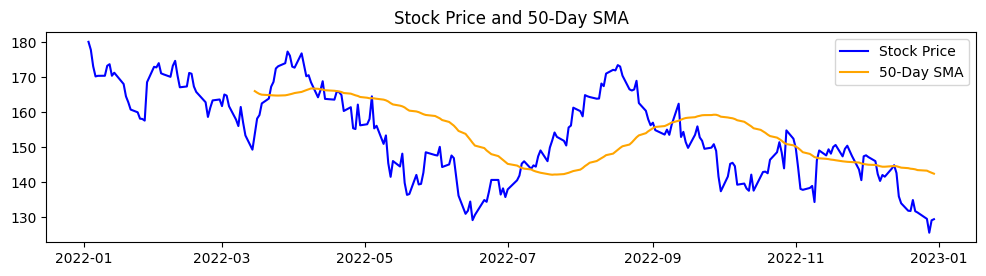

In [8]:
# Create visualizations
plt.figure(figsize=(12, 6))

# Plot the stock's closing price and the 50-day SMA
plt.subplot(2, 1, 1)
plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', color='blue')
plt.plot(stock_data.index, stock_data['SMA'], label='50-Day SMA', color='orange')
plt.title('Stock Price and 50-Day SMA')
plt.legend()


Text(0.5, 1.0, 'Trading Signals (1: Buy, -1: Sell)')

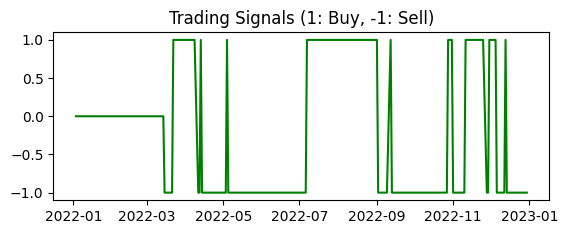

In [9]:
# Plot the trading signals
plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['Signal'], label='Signal', color='green')
plt.title('Trading Signals (1: Buy, -1: Sell)')

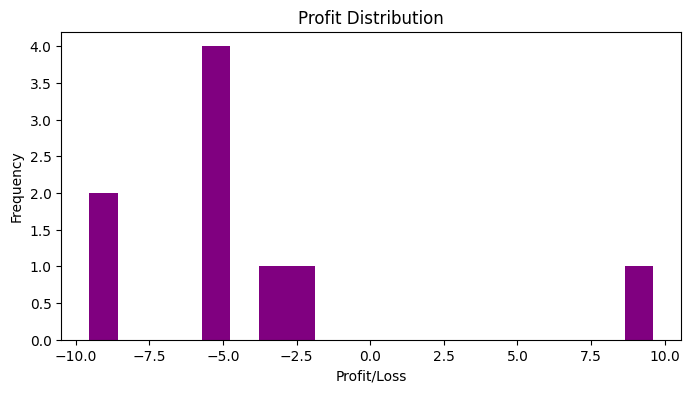

In [10]:
# Show a histogram of profits
plt.figure(figsize=(8, 4))
plt.hist(profits, bins=20, color='purple')
plt.title('Profit Distribution')
plt.xlabel('Profit/Loss')
plt.ylabel('Frequency')

plt.show()